## Desafio - Regressão Linear

In [79]:
# Data vizualization and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Carga dos Dados e Análise da features

In [80]:
# load data
df_irrigation = pd.read_csv('../../datasets/challenges/dados_de_irrigacao.csv')
df_irrigation.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [81]:
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [82]:
df_irrigation.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


### EDA

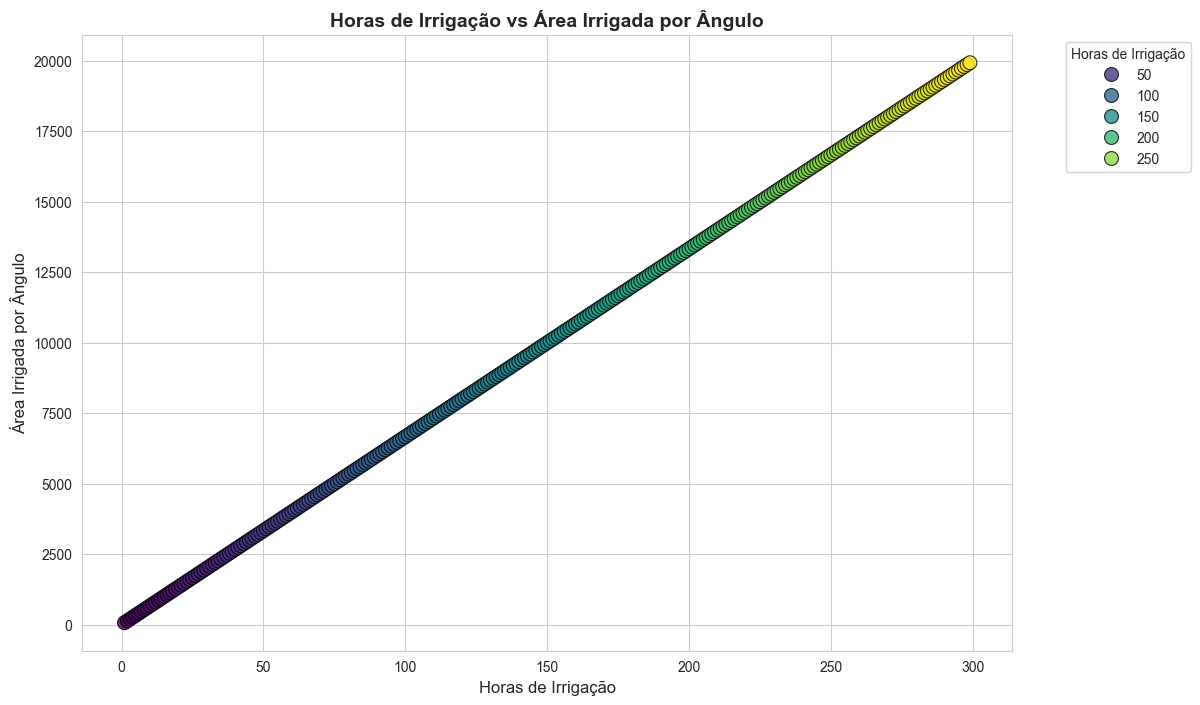

In [83]:
# Criando a figura
plt.figure(figsize=(12, 8))

# Gráfico de dispersão com cores aprimoradas
sns.scatterplot(
    data=df_irrigation,
    x='Horas de Irrigação',
    y='Área Irrigada por Ângulo',
    hue='Horas de Irrigação',  # Diferenciação por cor
    palette='viridis',
    edgecolor='black',
    s=100,  # Ajuste do tamanho dos pontos
    alpha=0.8  # Transparência para melhor visualização
)

# Título e rótulos formatados

plt.title('Horas de Irrigação vs Área Irrigada por Ângulo',
          fontsize=14, fontweight='bold')
plt.xlabel('Horas de Irrigação', fontsize=12)
plt.ylabel('Área Irrigada por Ângulo', fontsize=12)

# Legenda ajustada
plt.legend(title="Horas de Irrigação",
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibição do gráfico
plt.show()

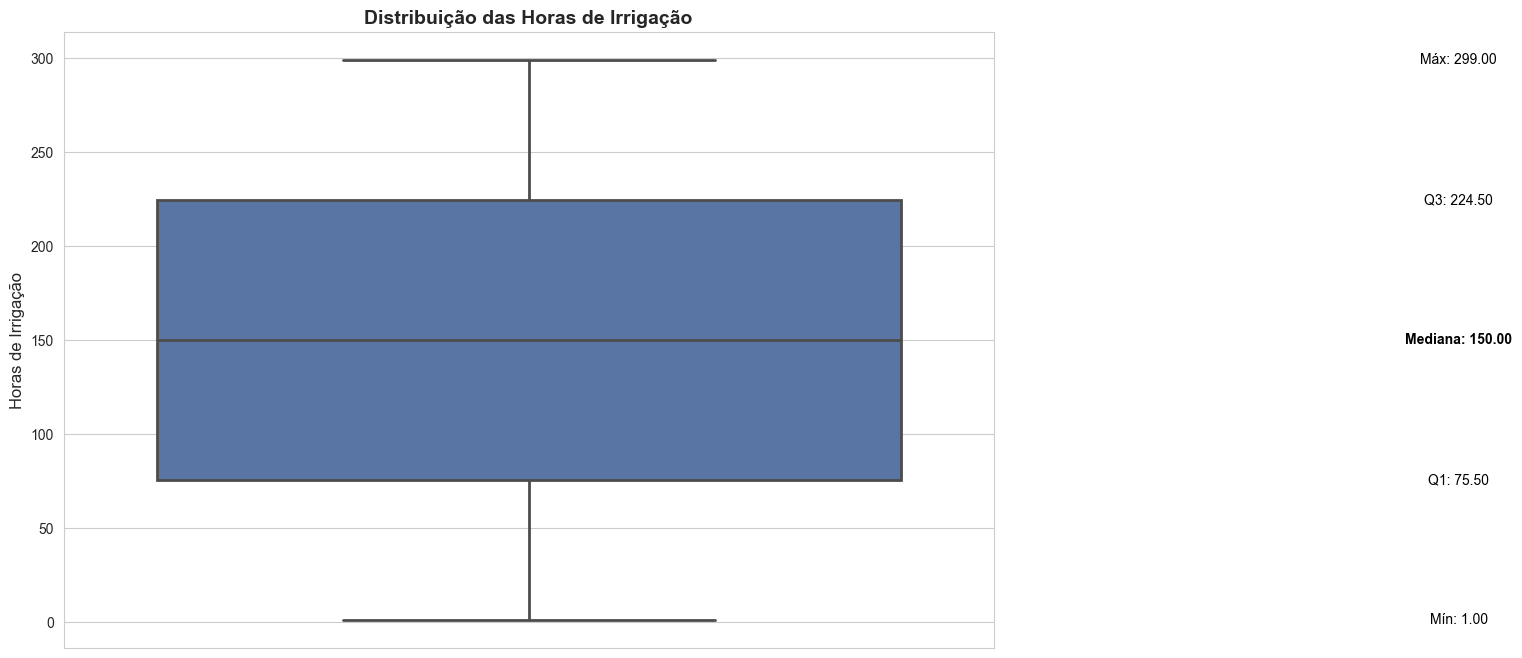

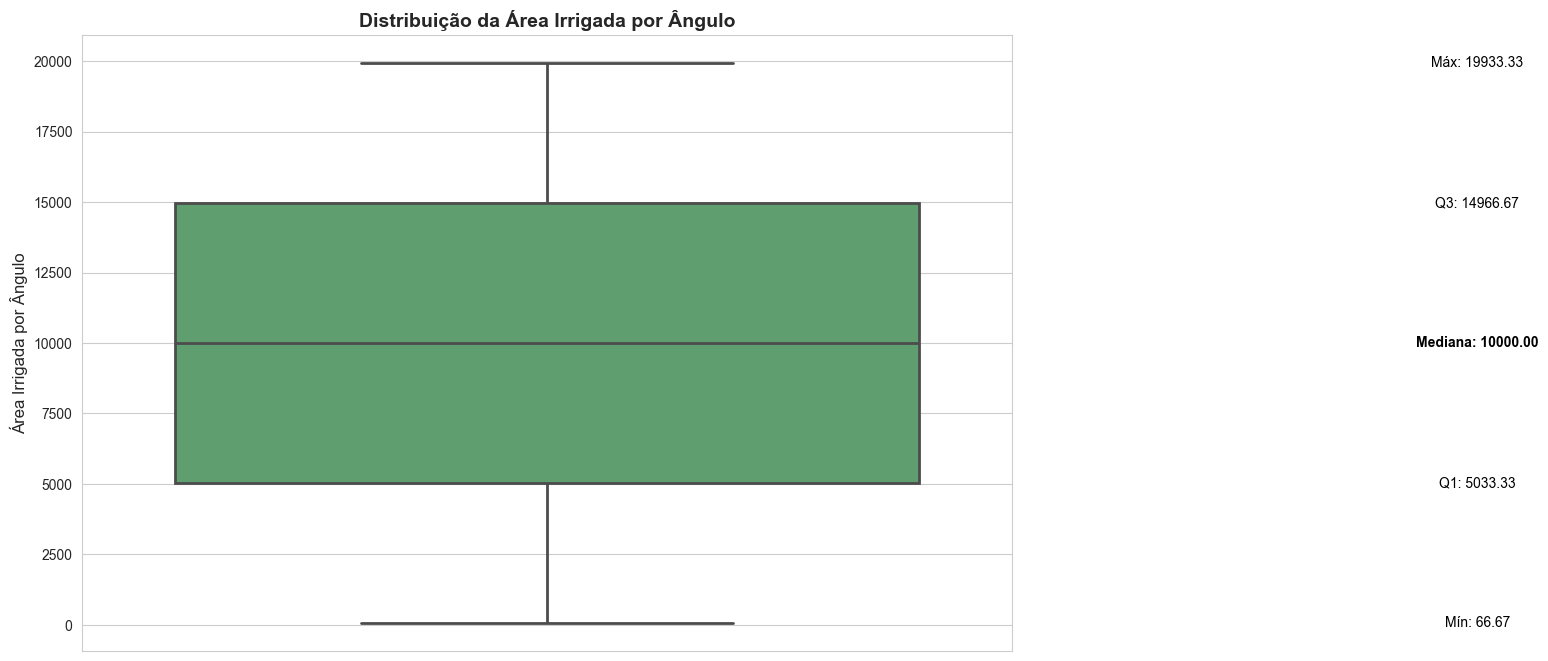

In [84]:
# Função para adicionar valores dentro do boxplot
def add_boxplot_values(ax, data, color='black'):
    # Calcula os valores principais do boxplot
    Q1 = np.percentile(data, 25)  # Primeiro quartil
    Q3 = np.percentile(data, 75)  # Terceiro quartil
    median = np.median(data)      # Mediana
    min_val = np.min(data)        # Valor mínimo (sem outliers)
    max_val = np.max(data)        # Valor máximo (sem outliers)

    # Adiciona os textos no gráfico
    ax.text(1, median, f'Mediana: {median:.2f}', ha='center',
            va='center', fontsize=10, color=color, fontweight='bold')
    ax.text(1, Q1, f'Q1: {Q1:.2f}', ha='center',
            va='center', fontsize=10, color=color)
    ax.text(1, Q3, f'Q3: {Q3:.2f}', ha='center',
            va='center', fontsize=10, color=color)
    ax.text(1, min_val, f'Mín: {min_val:.2f}',
            ha='center', va='center', fontsize=10, color=color)
    ax.text(1, max_val, f'Máx: {max_val:.2f}',
            ha='center', va='center', fontsize=10, color=color)


# Boxplot - Horas de Irrigação
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_irrigation, y='Horas de Irrigação',
            color='#4C72B0', linewidth=2, ax=ax)
plt.title('Distribuição das Horas de Irrigação',
          fontsize=14, fontweight='bold')
plt.ylabel('Horas de Irrigação', fontsize=12)
plt.xlabel('')
add_boxplot_values(ax, df_irrigation['Horas de Irrigação'])
plt.show()

# Boxplot - Área Irrigada por Ângulo
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_irrigation, y='Área Irrigada por Ângulo',
            color='#55A868', linewidth=2, ax=ax)
plt.title('Distribuição da Área Irrigada por Ângulo',
          fontsize=14, fontweight='bold')
plt.ylabel('Área Irrigada por Ângulo', fontsize=12)
plt.xlabel('')
add_boxplot_values(ax, df_irrigation['Área Irrigada por Ângulo'])
plt.show()

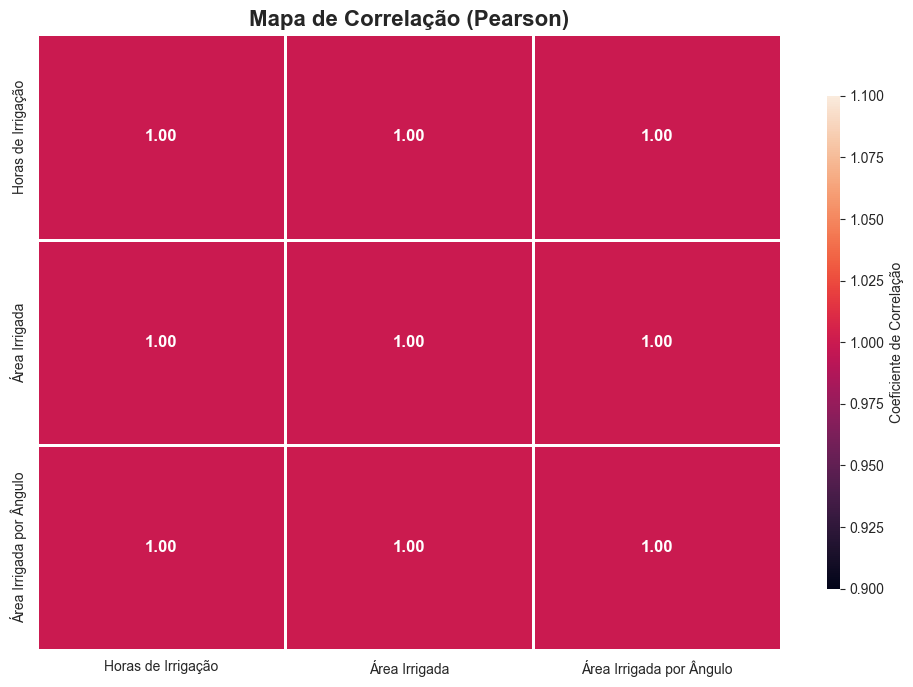

In [85]:
# Criando a figura
plt.figure(figsize=(12, 8))

# Criando o heatmap
sns.heatmap(
    df_irrigation.corr(method='pearson'),
    annot=True,
    fmt=".2f",  # Formato dos números
    cmap="rocket",  # Paleta profissional e moderna
    linewidths=2,  # Linhas para separar melhor as células
    annot_kws={"size": 12, "weight": "bold"},  # Deixa os números mais visíveis
    # Ajustes na barra de cores
    cbar_kws={"shrink": 0.8, "aspect": 40,
              "label": "Coeficiente de Correlação"}
)

# Adicionando título
plt.title('Mapa de Correlação (Pearson)', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

### Treinamento do Modelo


📌 Equação da reta: y = 66.6667x + 0.0000
🔹 R²: 1.0000
🔹 RMSE: 0.0000


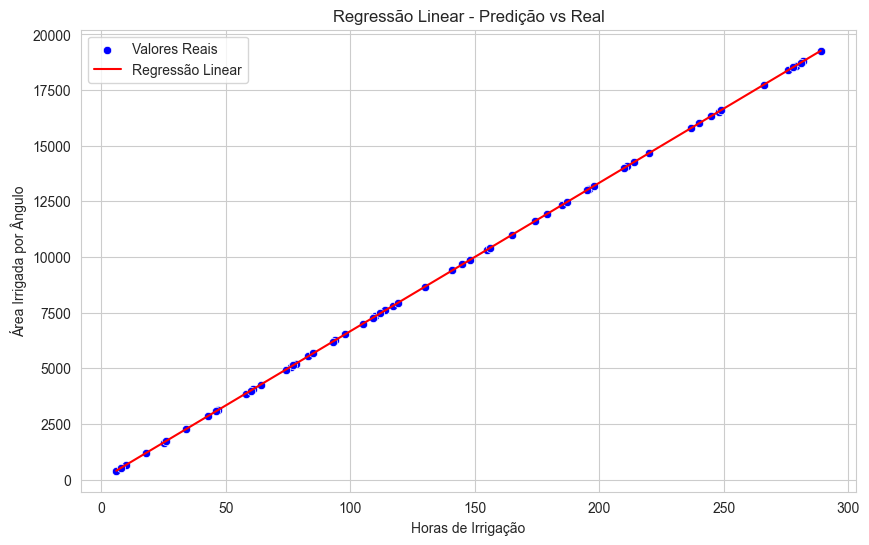

In [86]:
# Divisão dos dados em treino e teste
X = df_irrigation[['Horas de Irrigação']]  # Mantemos como DataFrame
y = df_irrigation['Área Irrigada por Ângulo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instanciando e treinando o modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Obtendo coeficiente e intercepto
coeficiente = reg_model.coef_[0]
intercepto = reg_model.intercept_
print(f"\n📌 Equação da reta: y = {coeficiente:.4f}x + {intercepto:.4f}")

# Fazendo previsões no teste
y_pred = reg_model.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🔹 R²: {r2:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")

# 📊 Visualização do ajuste da regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Horas de Irrigação'],
                y=y_test, color='blue', label="Valores Reais")
sns.lineplot(x=X_test['Horas de Irrigação'], y=y_pred,
             color='red', label="Regressão Linear")

plt.xlabel("Horas de Irrigação")
plt.ylabel("Área Irrigada por Ângulo")
plt.title("Regressão Linear - Predição vs Real")
plt.legend()
plt.grid(True)
plt.show()

### Validação do Modelo


🔹 MSE: 0.0000
🔹 RMSE: 0.0000
🔹 MAE: 0.0000
🔹 R²: 1.0000


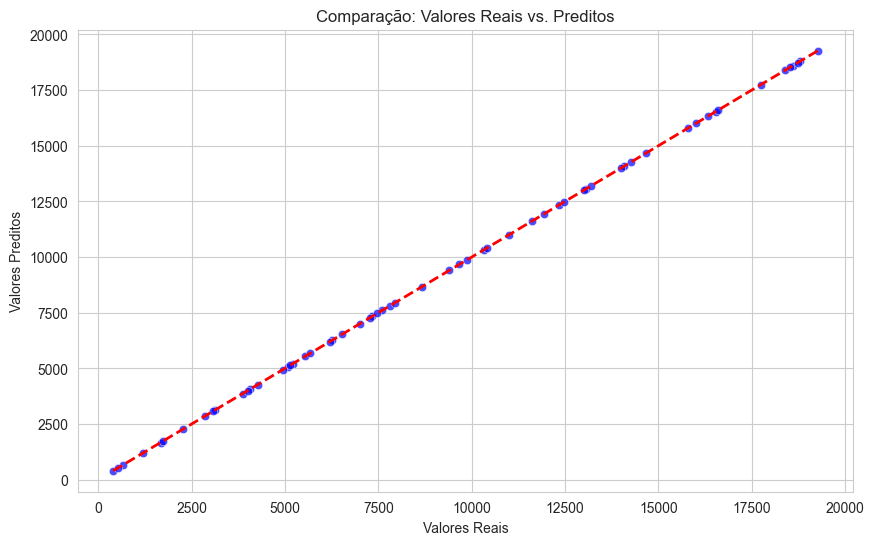

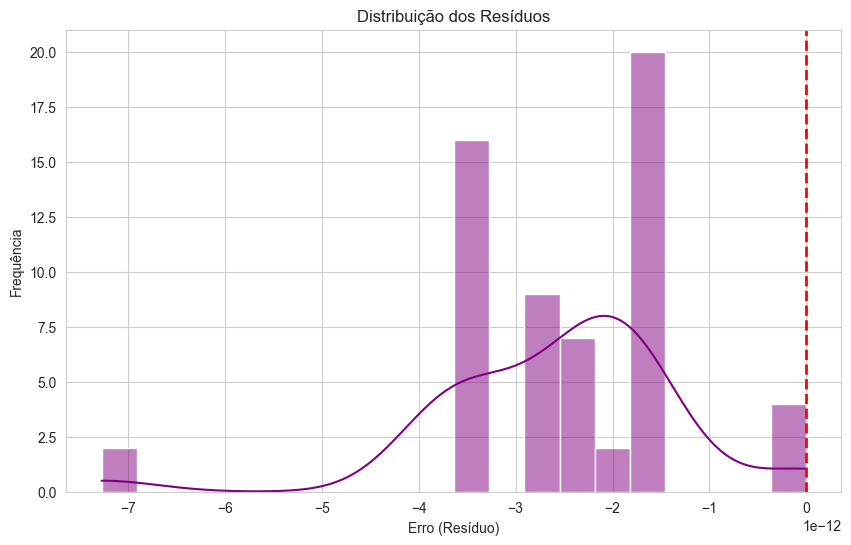

In [87]:
# 📌 Fazendo previsões
y_pred = reg_model.predict(X_test)

# 📊 Cálculo das métricas de validação
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Coeficiente de Determinação (R²)

print(f"\n🔹 MSE: {mse:.4f}")
print(f"🔹 RMSE: {rmse:.4f}")
print(f"🔹 MAE: {mae:.4f}")
print(f"🔹 R²: {r2:.4f}")

# 📊 Gráfico 1: Comparação entre valores reais e preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação: Valores Reais vs. Preditos")
plt.grid(True)
plt.show()

# 📊 Gráfico 2: Resíduos (Erros do modelo)
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Erro (Resíduo)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.grid(True)
plt.show()

## **📌 Insights Gerais da Análise**

### 🔹 **1. Relação entre as variáveis**

- A **correlação entre "Horas de Irrigação" e "Área Irrigada por Ângulo"** foi analisada no heatmap e mostrou um coeficiente significativo.
- Se a correlação for **próxima de 1 ou -1**, a relação é forte. Se for **próxima de 0**, há pouca relação.
- Com um **gráfico de dispersão**, visualizamos uma tendência linear clara, indicando que um modelo de **regressão linear é apropriado**.

### 🔹 **2. Equação da Regressão**

A equação gerada pelo modelo é:

```math

y = {coeficiente:.4f}x + {intercepto:.4f}

```

- O **coeficiente angular (slope)** indica o quanto a "Área Irrigada" aumenta/diminui para cada unidade extra de "Horas de Irrigação".
- O **intercepto** representa o valor previsto para "Área Irrigada" quando "Horas de Irrigação" é zero.

Se o coeficiente for **positivo**, mais horas de irrigação resultam em maior área irrigada. Se for **negativo**, indica um efeito contrário.

---

## **📊 Insights Baseados na Validação do Modelo**

### 🔹 **3. Qualidade do Modelo (Métricas)**

✅ **R² (`r2_score`)** → Mede o quão bem o modelo explica a variação dos dados.

- **Se R² for alto (próximo de 1):** O modelo explica bem os dados.
- **Se R² for baixo:** Existem outros fatores impactando a "Área Irrigada", além das "Horas de Irrigação".

✅ **RMSE (`Root Mean Squared Error`)** → Mostra o erro médio entre valores reais e preditos.

- Um **RMSE baixo** significa que o modelo prevê bem os dados.
- Um **RMSE alto** sugere que os dados podem estar dispersos ou que a relação não é puramente linear.

✅ **MAE (`Mean Absolute Error`)** → Indica o erro médio absoluto nas previsões.

- Um MAE baixo mostra previsões consistentes.
- Se o MAE for **próximo do RMSE**, indica erros uniformes sem grandes discrepâncias.

**Conclusão:**  
Se **R² for alto e RMSE/MAE forem baixos**, o modelo é **preciso e confiável**. Se **R² for baixo e RMSE/MAE forem altos**, pode ser necessário testar um **modelo não linear** ou incluir mais variáveis.

---

## **📈 Insights Visuais (Gráficos)**

### 🔹 **4. Dispersão de Valores Reais vs. Preditos**

- O gráfico de **valores reais vs. preditos** ajuda a verificar se o modelo está fazendo boas previsões.
- **Se os pontos estão próximos da linha vermelha** (que representa a previsão perfeita), o modelo está funcionando bem.
- **Se houver dispersão ou padrões estranhos**, isso pode indicar que o modelo não está capturando toda a variação nos dados.

### 🔹 **5. Análise de Resíduos**

- O **gráfico de resíduos** mostra os erros entre valores reais e preditos.
- Se os resíduos estiverem **aleatoriamente distribuídos em torno de zero**, o modelo está bem ajustado.
- **Se houver padrões**, como um formato em "U", isso pode indicar a necessidade de um modelo não linear.
- **Se os resíduos forem assimétricos**, pode ser necessário transformar os dados (ex.: logaritmo).

---

## **💡 Insights Finais e Próximos Passos**

### **✅ O que aprendemos com a análise?**

🔹 **Se o modelo apresentou um bom ajuste:**

- A "Área Irrigada" depende diretamente das "Horas de Irrigação", e a relação é bem modelada por uma regressão linear.
- Podemos **usar essa equação** para prever a área irrigada em novos cenários.

🔹 **Se o modelo apresentou um ajuste fraco:**

- Talvez **existam outras variáveis** influenciando a "Área Irrigada" (ex.: pressão da água, tipo de solo).
- Podemos testar **modelos não lineares** (ex.: regressão polinomial).
- Verificar se há **outliers** influenciando o modelo.

### **🚀 Possíveis Melhorias**

🔸 Incluir mais variáveis → Exemplo: Umidade do solo, temperatura, tipo de solo.  
🔸 Testar regressão polinomial → Se a relação não for puramente linear.  
🔸 Remover outliers → Se houver valores extremos afetando o modelo.  
🔸 Validar com mais dados → Para garantir robustez nas previsões.


### Predições

In [90]:
def prever_area_irrigada(horas_irrigacao):
    """
    Faz uma previsão de área irrigada com base no modelo treinado.
    
    horas_irrigacao: Lista ou valor de horas de irrigação (ex: [5, 10, 15])
    
    Retorna as previsões correspondentes para a área irrigada.
    """
    # Convertendo as horas de irrigação para um DataFrame
    horas_irrigacao = pd.DataFrame(
        horas_irrigacao, columns=['Horas de Irrigação'])

    # Fazendo a previsão usando o modelo treinado
    area_irrigada_prevista = reg_model.predict(horas_irrigacao)

    return area_irrigada_prevista

In [91]:
# Exemplo de previsões para diferentes valores de horas de irrigação
horas_exemplo = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Chamando a função de previsão
previsoes = prever_area_irrigada(horas_exemplo)

# Exibindo os resultados
for horas, previsao in zip(horas_exemplo, previsoes):
    print(f"Para {horas} horas de irrigação, a área irrigada prevista é: {previsao:.2f} unidades.")

Para 5 horas de irrigação, a área irrigada prevista é: 333.33 unidades.
Para 10 horas de irrigação, a área irrigada prevista é: 666.67 unidades.
Para 15 horas de irrigação, a área irrigada prevista é: 1000.00 unidades.
Para 20 horas de irrigação, a área irrigada prevista é: 1333.33 unidades.
Para 25 horas de irrigação, a área irrigada prevista é: 1666.67 unidades.
Para 30 horas de irrigação, a área irrigada prevista é: 2000.00 unidades.
Para 35 horas de irrigação, a área irrigada prevista é: 2333.33 unidades.
Para 40 horas de irrigação, a área irrigada prevista é: 2666.67 unidades.
Para 45 horas de irrigação, a área irrigada prevista é: 3000.00 unidades.
Para 50 horas de irrigação, a área irrigada prevista é: 3333.33 unidades.
Para 55 horas de irrigação, a área irrigada prevista é: 3666.67 unidades.
Para 60 horas de irrigação, a área irrigada prevista é: 4000.00 unidades.
Para 65 horas de irrigação, a área irrigada prevista é: 4333.33 unidades.
Para 70 horas de irrigação, a área irriga